# Om Mistry

## **How does Educational attainment relate to gun deaths in America and what other factors affect this relationship ?**

Sub-Questions to achieve the above goal:
- Is there a correlation between educational attainment and gun deaths rates in the United States after controlling for other demographic and contextual factors, such as age, gender, race, religion and gun ownership rates ? This could be done using regression analysis to examine the contribution of education while keeping the other factors constant.
- To what extent does the knowledge of gun safety or ownership meditate the relationship between gun deaths and education ? This could be monitored by using the "intent" column of the dataset.
- Are there differences in the relationship between education and gun deaths across different age groups, race, or geographical regions? We could explore whether the protective effects of education are stronger for younger or elder individuals for certain racial groups.


## EDA (Exploratory Data Analysis)

In [33]:
from project_functions1 import *
import_libraries()

### Loading the dataset

In [34]:
load_and_process("../data/raw/full_data.csv")

In [35]:
#Looking at the unique values of each variable in the dataset
data_cleaned.nunique(axis=0)

year           3
month         12
intent         4
police         2
sex            2
age          103
race           5
place         10
education      4
dtype: int64

In [36]:
data_cleaned.describe()

,year,month,police,age
count,98015.000000,98015.000000,98015.000000,98015.000000
mean,2013.000561,6.567780,0.000194,43.900209
std,0.816136,3.406984,0.013922,19.522908
min,2012.000000,1.000000,0.000000,0.000000
25%,2012.000000,4.000000,0.000000,27.000000
50%,2013.000000,7.000000,0.000000,42.000000
75%,2014.000000,9.000000,0.000000,58.000000
max,2014.000000,12.000000,1.000000,107.000000


### The raw dataset has now been cleaned and processed. Lets take a look at it.

In [37]:
data_cleaned

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...
98010,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
98011,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
98012,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
98013,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS


In [38]:
#Sub setting data with only relevant columns 
# Descriptive Statistics by Educational level
stats(data_cleaned)

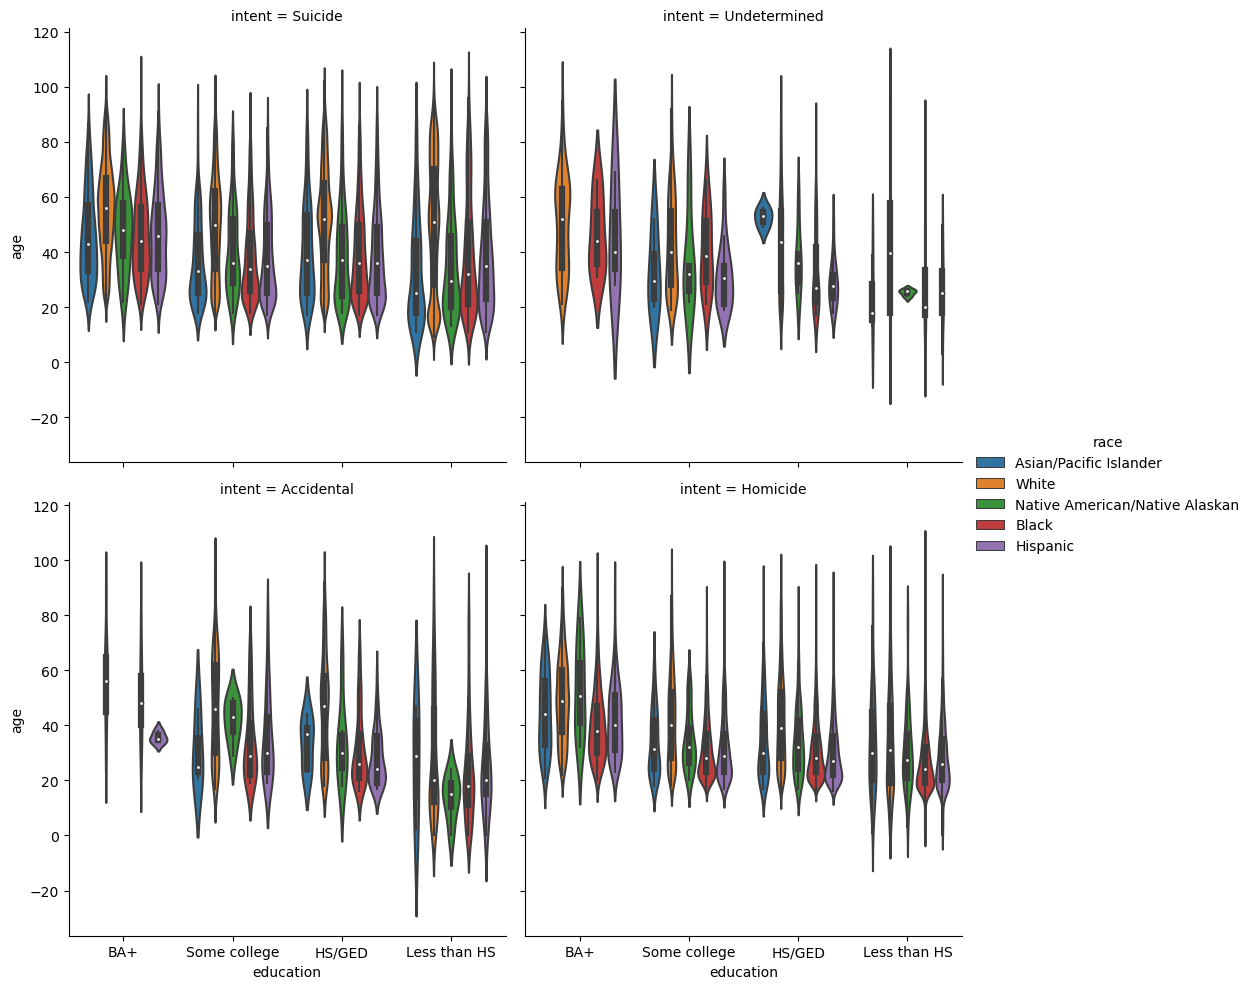

In [39]:
# Visualizing the relationship between education and gun deaths 
sns.catplot(data=df1, x='education', y='age',hue='race',col='intent',kind='violin',col_wrap=2)

- **We can see from the above graphs that regardless of the intent of death, the people with less education than high school die at a younger age than the ones having a BA+ education.**
- **We can also observe that younger people with less education have more cases of accidental deaths while the more older and educated people die from suicide and homicide.**

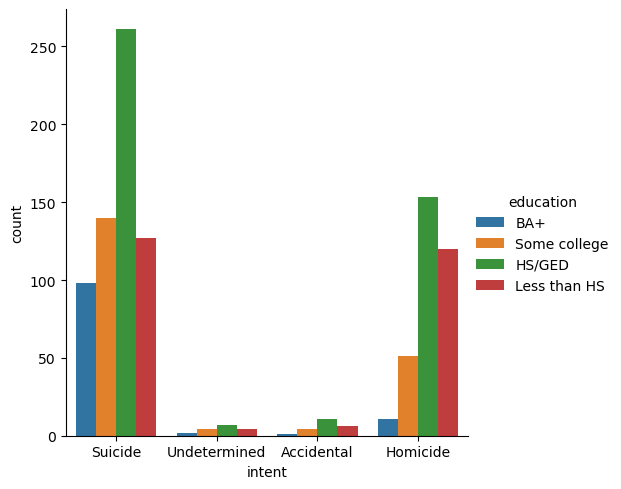

In [40]:
# Sub setting relevant columns from the main cleaned data set 
# Creating a new variable indicating the type of death
# Visualization the distribution of gun deaths by intent and education
(data_cleaned[['education', 'intent']]
 .iloc[:1000]
 .assign(death_type=lambda x: x['intent'].replace({
     'Accidental': 'Unintentional',
     'NA': 'other',
     'Undetermined': 'other'
 }).fillna('Homicide'))
 .pipe((sns.catplot, 'data'), x='intent', kind='count', hue='education')
)

[Text(0.5, 0, 'Education'), Text(0, 0.5, 'Age of Victim')]

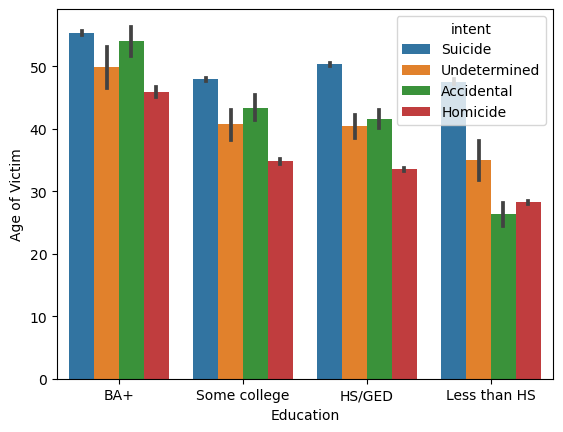

In [41]:
#Sub setting the data set again to work with variables that are relevant 
# Visualization
(data_cleaned[['age','race','sex','education','intent','place']]
.pipe((sns.barplot,'data'), x='education', y='age', hue='intent')
.set(xlabel='Education', ylabel='Age of Victim'))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

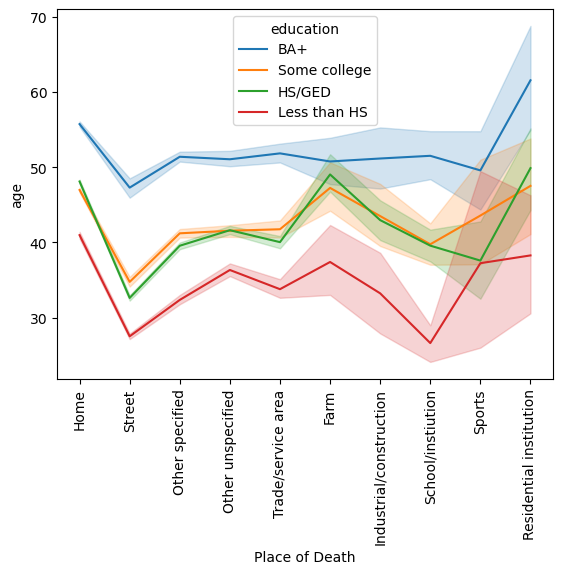

In [42]:
(data_cleaned
.pipe((sns.lineplot,'data'), x='place', y='age', hue='education')
.set(xlabel="Place of Death")
)
plt.xticks(rotation=90)

C:\Users\OM\AppData\Local\Temp\ipykernel_24712\3384913939.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  relation = data_cleaned.corr()


<AxesSubplot:>

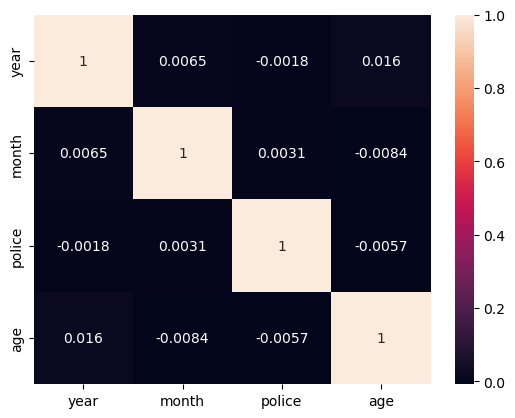

In [44]:
relation = data_cleaned.corr()
sns.heatmap(relation, xticklabels=relation.columns, yticklabels=relation.columns, annot=True)

**Trying to see if any of the variables have any correlations using a heatmap**

In [43]:
#Loading the processed data into a csv file
data_cleaned.to_csv('../data/processed/processed.csv', index=False)

# Observations from the above EDA
- The descriptive statistics shows that individuals with lower levels of education tend to have a higher rates of gun deaths.
- The violin plots show that the relationship between education and gun deaths varies by race and intent. For example, for intentional deaths, the median age of victims decreases as education level increases, and this trend is more pronounced for White individuals than for other racial groups.
- The count plot distribution shows that most deaths are intentional (suicide or homicide) .
- The bar plot also gives an idea that the age of the victim gets lower with the amount of education they receive. For example, someone with an education less than HS is more likely to face gun violence of some kind (highly intentional) at a younger age than someone with a higher education.